In [3]:
import os
import json

import pandas as pd

In [4]:
FOLDER = '/mnt/hgfs/ssd_tmp/'
h5_filename = os.path.join(FOLDER, 'das_example.h5')

reference_file = 'results_20210809/das_h5/das_example_ref_fs.json'

with open(reference_file,'r') as f:
  data = json.load(f)
f"{reference_file} has {len(data['refs'])} references"

'results_20210809/das_h5/das_example_ref_fs.json has 49 references'

In [5]:
def create_reference_dataFrame(data):
    '''
        Create a dataframe from the references
    '''
    ref_l = []
    template = data['templates']
    print(template['u'])

    for k,v in data['refs'].items():
        if isinstance(v,list):
            ref_d = {}
            ref_d['name'] = k
            ref_d['key'] = template[v[0][2]]
            ref_d['offset'] = v[1]
            ref_d['bytes'] = v[2]
            ref_d['end'] = ref_d['offset'] + ref_d['bytes'] - 1
            ref_l.append(ref_d)

    # create dataframe sorted by offset and reindexed
    df = pd.DataFrame(ref_l).sort_values('offset').reset_index()
    #
    # add gap column
    df['gap'] = df['offset'] - df.shift(1)['end']

    # return the dataframe
    return df

In [6]:
ref_df = create_reference_dataFrame(data)
total_data = ref_df.bytes.sum()
maxEnd = ref_df.end.max()
coverage = total_data / maxEnd
print(ref_df.head())
f"Total data: {total_data} Largest end: {maxEnd}  Approximate coverage: {coverage:.2f}"

file:///mnt/hgfs/ssd_tmp/das_example.h5
   index          name                                      key   offset  \
0      0  Acoustic/0.0  file:///mnt/hgfs/ssd_tmp/das_example.h5    15664   
1      1  Acoustic/1.0  file:///mnt/hgfs/ssd_tmp/das_example.h5  1063984   
2     12  Acoustic/2.0  file:///mnt/hgfs/ssd_tmp/das_example.h5  2112304   
3     23  Acoustic/3.0  file:///mnt/hgfs/ssd_tmp/das_example.h5  3160624   
4     34  Acoustic/4.0  file:///mnt/hgfs/ssd_tmp/das_example.h5  4208944   

     bytes      end  gap  
0  1048320  1063983  NaN  
1  1048320  2112303  1.0  
2  1048320  3160623  1.0  
3  1048320  4208943  1.0  
4  1048320  5257263  1.0  


'Total data: 48222720 Largest end: 48238383  Approximate coverage: 1.00'

In [7]:
#
# calculate the gap between contiguous blocks
#
ref_df['gap'] = ref_df['offset'] - ref_df.shift(1)['end']
pd.set_option('max_colwidth', 90)
ref_df.head(10)

,index,name,key,offset,bytes,end,gap
0,0,Acoustic/0.0,file:///mnt/hgfs/ssd_tmp/das_example.h5,15664,1048320,1063983,NaN
1,1,Acoustic/1.0,file:///mnt/hgfs/ssd_tmp/das_example.h5,1063984,1048320,2112303,1.0
2,12,Acoustic/2.0,file:///mnt/hgfs/ssd_tmp/das_example.h5,2112304,1048320,3160623,1.0
3,23,Acoustic/3.0,file:///mnt/hgfs/ssd_tmp/das_example.h5,3160624,1048320,4208943,1.0
4,34,Acoustic/4.0,file:///mnt/hgfs/ssd_tmp/das_example.h5,4208944,1048320,5257263,1.0
5,41,Acoustic/5.0,file:///mnt/hgfs/ssd_tmp/das_example.h5,5257264,1048320,6305583,1.0
6,42,Acoustic/6.0,file:///mnt/hgfs/ssd_tmp/das_example.h5,6305584,1048320,7353903,1.0
7,43,Acoustic/7.0,file:///mnt/hgfs/ssd_tmp/das_example.h5,7353904,1048320,8402223,1.0
8,44,Acoustic/8.0,file:///mnt/hgfs/ssd_tmp/das_example.h5,8402224,1048320,9450543,1.0
9,45,Acoustic/9.0,file:///mnt/hgfs/ssd_tmp/das_example.h5,9450544,1048320,10498863,1.0


array([[<AxesSubplot:title={'center':'bytes'}>]], dtype=object)

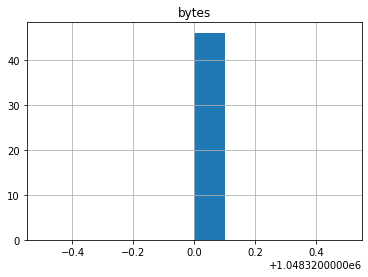

In [8]:
ref_df.hist(column='bytes')

In [9]:
ref_df[ref_df.bytes <= 10000].head(30)

,index,name,key,offset,bytes,end,gap


In [10]:
ref_df.bytes.value_counts()

1048320    46
Name: bytes, dtype: int64

array([[<AxesSubplot:title={'center':'gap'}>]], dtype=object)

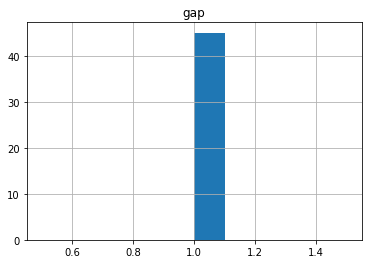

In [11]:
ref_df.hist(column='gap')

In [12]:
ref_df[ref_df.gap > 1]

,index,name,key,offset,bytes,end,gap
